<a href="https://colab.research.google.com/github/KennethTBarrett/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/KennethTBarrett_of_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [97]:
import math
import numpy as np
import pandas as pd

### Data
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

### Calculating the Mean
sales_sum = sum(sales)
mean_sales = sales_sum/len(sales)

### Calculating the Variance

## Let's make some functions!
def subt_mean(num):
  return num - sales_sum

# And practice a lambda function....
lambda x: x - mean_sales

distances = list(map(subt_mean, sales))
sqd_distance = list(map(lambda x: x**2, distances))

list_len = len(sqd_distance)
sales_var = sum(sqd_distance) / list_len

### Calculating Standard Deviation (was not in lecture if I remember right, so using numpy, hope that's okay!)
stddev = np.std(sales, ddof = 1)


### Let's print it all out now!
print('Mean for sales for the past week:', mean_sales)
print('Variance of sales for the past week:', sales_var)
print('Standard Deviation of sales for the past week:', stddev)

Mean for sales for the past week: 3052.714285714286
Variance of sales for the past week: 335670083.4285714
Standard Deviation of sales for the past week: 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [98]:
wk2 = [127, 80, 105, 92, 120, 115, 93]

cov = np.cov(sales, wk2)

print("Covariance between week 1's sales and week 2's number of customers:", cov[0][1])

Covariance between week 1's sales and week 2's number of customers: 7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [99]:
std2 = np.std(wk2, ddof=1)

print("Standard Deviation of week 2's number of customers:", std2)

### Note to self that lower case 'r' is representative of correlation coefficient.
cov_wk = np.cov(sales, wk2)
denom = stddev * std2
r = cov_wk / denom

## Let's print the results!
print('Correlation coefficient describing relationship b/t sales and customers:', r[0][1])

### Let's check it using pandas!

df = pd.DataFrame({"wk1_sales": sales, "wk2_cust":wk2})

print('(Double Checking) r of:', df['wk1_sales'].corr(df['wk2_cust'])) # Correct!

Standard Deviation of week 2's number of customers: 17.057326313123664
Correlation coefficient describing relationship b/t sales and customers: 0.9628339778148909
(Double Checking) r of: 0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [100]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

df = pd.read_csv(url)

df.head()
# Numeric columns: pclass, survived, age, sbsp, parch, ticket, fare, boat, body, has_cabin_number 
# (not including Unnamed because it's an identifier, not a value related to data)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [101]:
df.cov() # Covariance of this dataset

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [102]:
df.corr() # r of this dataset

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

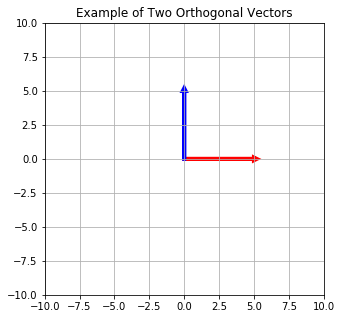

In [103]:
import matplotlib.pyplot as plt

# Setting values of the vectors
vector1 = np.array([5, 0])
vector2 = np.array([0, 5])

fig, ax = plt.subplots(figsize=(5,5))
ax.grid()

plt.title('Example of Two Orthogonal Vectors')
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Plot the vectors
plt.arrow(0,0, vector1[0], vector1[1], head_width=.2, head_length=0.2, linewidth=4, color ='red')
plt.arrow(0,0, vector2[0], vector2[1], head_width=.2, head_length=0.2, linewidth=4, color ='blue')
plt.show()

# Perpendicular is a synonym for orthogonal.

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [104]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

isorth = np.dot(a, b)

def isortho():
  if isorth == 0:
    return 'is 0, meaning the vectors are orthogonal!'
  else:
    return 'is NOT equal to 0, meaning the vectors are NOT orthogonal.'

print("Dot product of vectors", isortho())

Dot product of vectors is NOT equal to 0, meaning the vectors are NOT orthogonal.


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [105]:
c = np.array([2, -15, 6, 20])

### Part 1
print('The norm of c^2 is:', np.linalg.norm(c)**2)

### Part 2
print('c ⋅ c is:', np.dot(c, c))

# Part 3
print('c.T * c is:', np.matmul(c.T, c))

The norm of c^2 is: 665.0
c ⋅ c is: 665
c.T * c is: 665


# Unit Vectors

## 3.1 Using LaTeX, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

I definitely need help here. Spent way too long trying to understand but still have 0 understanding of LaTeX.

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [106]:
f = np.array([4, 12, 11, 9, 2])

unit_vector = f / np.linalg.norm(f)

print('Unit Vector f:', unit_vector)

len_f = np.linalg.norm(unit_vector)

def confirm():
  if len_f < 0.9999:
    return 'Results are NOT confirmed!'
  else:
    return 'Results are confirmed!'

print('Confirming...', confirm())

Unit Vector f: [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]
Confirming... Results are confirmed!


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

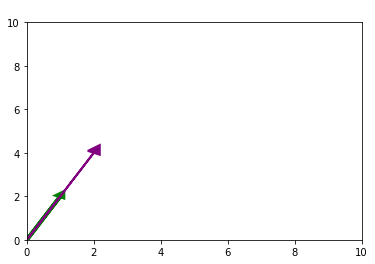

In [107]:
d1 = np.array([1, 2])
d2 = np.array([2, 4])

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title('Example of Linearly Dependent Vectors', color = 'white')


plt.arrow(0, 0, d1[0], d1[1], head_length = 0.2, head_width = 0.2, linewidth = 4, color = 'green')
plt.arrow(0, 0, d2[0], d2[1], head_length = 0.4, head_width = 0.4, linewidth = 2, color = 'purple');

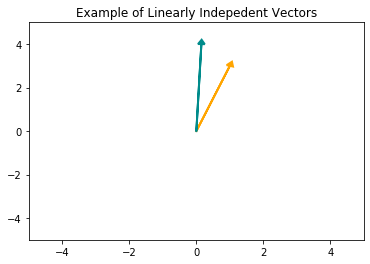

In [108]:
i1 = np.array([1, 3])
i2 = np.array([0.15, 4])

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title('Example of Linearly Indepedent Vectors')

plt.arrow(0, 0, i1[0], i1[1], head_length = 0.2, head_width = 0.2, linewidth = 2, color = 'orange')
plt.arrow(0, 0, i2[0], i2[1], head_length = 0.2, head_width = 0.2, linewidth = 2, color = 'darkcyan');

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
### Because these 2 vectors are linearly dependent, their span is the line on which they lie.
### The line of which they lie is y = (1/2)x, meaning that the 'y' value is 1/2 of what the 'x' value is.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [110]:
span_lmn = np.linalg.matrix_rank([1, 2, 3], [-1, 0, 7], [4, 8, 2])

print('The span of {l, m, n} is:', span_lmn)

The span of {l, m, n} is: 1


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



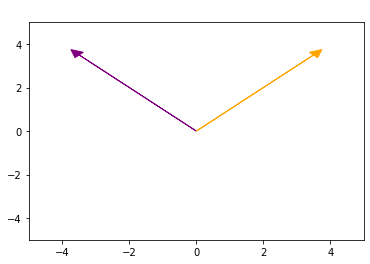

In [111]:
vec1 = np.array([-3.5, 3.5])
vec2 = np.array([3.5, 3.5])

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title('R^2 Basis Vectors Example', color = 'white')

plt.arrow(0, 0, vec1[0], vec1[1], head_width = .35, head_length = 0.35, color = 'purple')
plt.arrow(0, 0, vec2[0], vec2[1], head_width = .35, head_length = 0.35, color = 'orange');

## 6.2 What does it mean to form a basis?

The basis of a vector space (V) is a set of vectors linearly independent and span the vector space in terms of dimension.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [112]:
P = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])

rank_P = np.linalg.matrix_rank(P)

print('The rank of matrix P is:', rank_P)

The rank of matrix P is: 3


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of vector space spanned by columns. The matrix rank corresponds to the max number of linearly independent columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


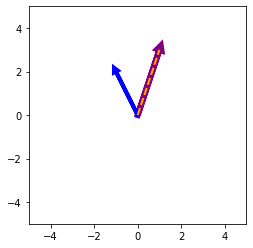

In [133]:
v = np.array([1, 3])
w = np.array([-1, 2])

axes = plt.gca()

# Let's do some math for the projection!
wdotv = np.dot(w, v)
vdotv = np.dot(v, v)
fraction = wdotv / vdotv
proj = np.multiply(fraction, v)

# Getting values for L
x_vals = np.array(axes.get_xlim())
y_vals = x_vals * 3


plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.axes().set_aspect('equal')

plt.arrow(0, 0, v[0], v[1], head_length = 0.2, head_width = 0.2, linewidth = 6, color = 'purple')
plt.arrow(0, 0, w[0], w[1], head_length = 0.2, head_width = 0.2, linewidth = 4, color = 'blue')
plt.plot(x_vals, y_vals, '--', linewidth = 2, color = 'orange')

plt.show();

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()